<a href="https://colab.research.google.com/github/derektorquette/processamento-de-lingua-natural-ufmg/blob/main/3_modelos_de_linguagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Aula 3.4: Modelos de Linguagem: Implementação em Python**

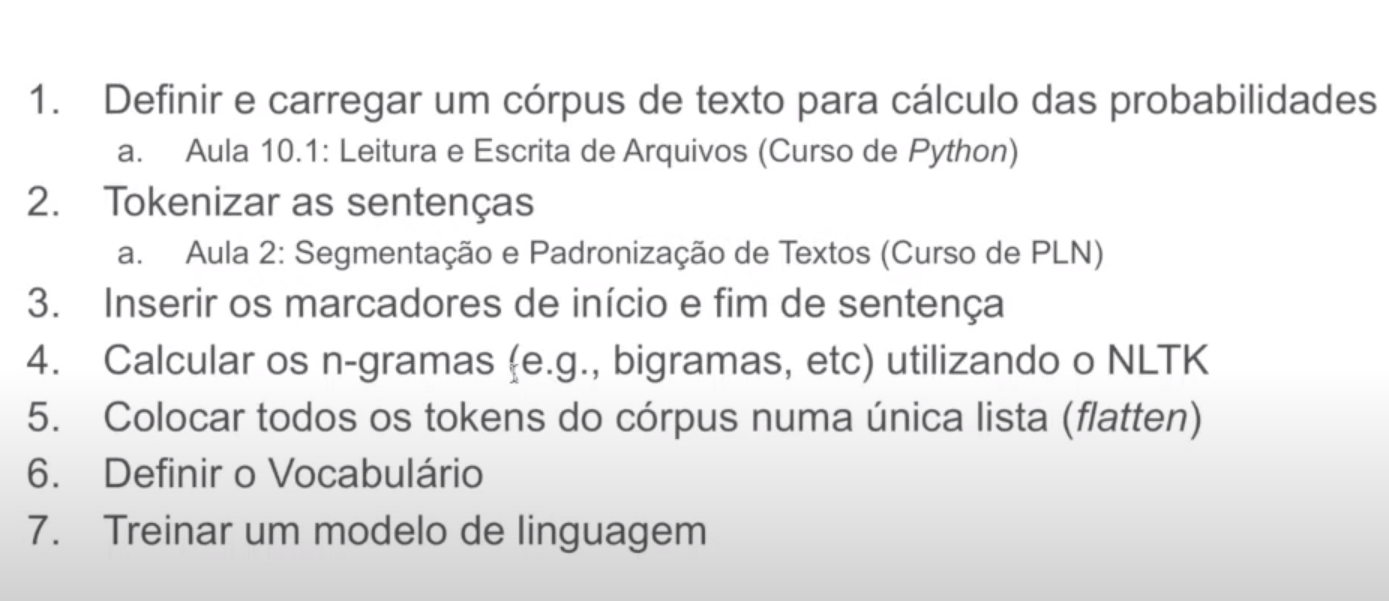

In [ ]:
!pip3 install nltk==3.5

In [ ]:
import nltk
nltk.download('punkt')

##**PASSO 1 - CARREGAR O CORPUS**

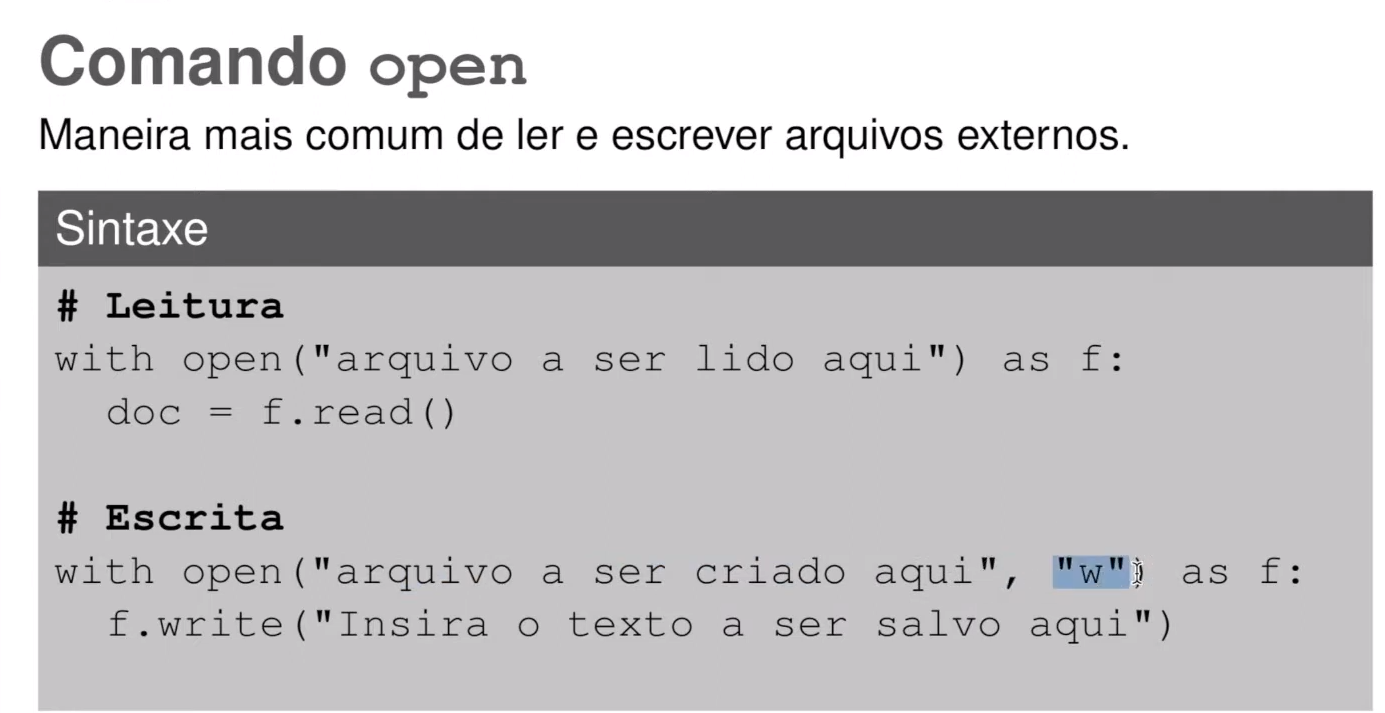

In [ ]:
texto = """Armas de fogo, meu corpo não alcançará
Espadas, facas e lanças se quebrem
Sem o meu corpo tocar
Cordas, correntes se arrebentem
Sem o meu corpo amarrar
Pois eu estou vestido com as roupas e as armas de Jorge"""


texto = texto.lower().split('\n')
texto

Esse trecho de código tem duas partes principais:

texto.lower(): Aqui, o método lower() é chamado no objeto texto. Esse método retorna uma versão em minúsculas da string original. Portanto, qualquer caractere maiúsculo na string original texto será convertido para minúsculo.

.split('\n'): Depois de converter o texto para minúsculas, o método split('\n') é chamado. Esse método divide a string em substrings usando o caractere de quebra de linha ('\n') como delimitador. Isso significa que cada vez que o código encontrar um caractere de nova linha na string, ele dividirá a string em duas partes. O resultado é uma lista de substrings, onde cada elemento da lista é uma linha do texto original.

Então, no final, a variável texto será uma lista onde cada elemento é uma linha do texto original convertido para minúsculas.

##**SEGUNDO PASSO: TOKENIZAR AS SENTENÇAS**



In [ ]:
texto_tok = []
for verso in texto:
  tokens = nltk.word_tokenize(verso, language='portuguese')
  texto_tok.append(tokens)

texto_tok


[['armas', 'de', 'fogo', ',', 'meu', 'corpo', 'não', 'alcançará'],
 ['espadas', ',', 'facas', 'e', 'lanças', 'se', 'quebrem'],
 ['sem', 'o', 'meu', 'corpo', 'tocar'],
 ['cordas', ',', 'correntes', 'se', 'arrebentem'],
 ['sem', 'o', 'meu', 'corpo', 'amarrar'],
 ['pois',
  'eu',
  'estou',
  'vestido',
  'com',
  'as',
  'roupas',
  'e',
  'as',
  'armas',
  'de',
  'jorge']]

##**PASSO 3: INSERINDO MARCADORES DE INÍCIO E FIM DE SENTENÇA**

In [ ]:
from nltk.lm.preprocessing import pad_both_ends

ngramas = 2

texto_tok_pad = []
for verso in texto_tok:
  padded= list(pad_both_ends(verso, n=ngramas))
  texto_tok_pad.append(padded)

texto_tok_pad

##**PASSO 4 - CALCULANDO N-GRAMAS**



In [ ]:
ngramas = 2

bigramas_pad = []
for verso in texto_tok_pad:
  bigramas = list(nltk.ngrams(verso, n=ngramas))
  bigramas_pad.append(bigramas)

bigramas_pad

## - CONTUDO, PARA DEIXAR O MODELO MAIS ROBUSTO, VAMOS CALCULAR OS UNIGRAMAS ALÉM DOS BIGRAMAS UTILIZANDO O COMNADO "nltk.util.everygrams:

-**VAMOS CALCULAR OS N-GRAMAS E OS BI-GRAMAS**

In [ ]:
from nltk.util import everygrams

ngramas = 2
ngramas_pad = []
for verso in texto_tok_pad:
  bigramas= list(everygrams(verso, max_len=ngramas))
  ngramas_pad.append(bigramas)

ngramas_pad

##**PASSO 5 - COLOCANDO TODOS OS TOKENS DO CÓRPUS NUMA ÚNICA LISTA**

nltk.lm.preprocessing.flatten:

**- este método junta os elementos de sublista em uma única lista**

**- Como pode ser visto abaixo, nós utilizamos para juntar todos os tokens das sentenças de nosso corpus numa única lista**

In [ ]:
from nltk.lm.preprocessing import flatten

tokens = list(flatten(texto_tok_pad))
tokens

##**PASSO 6 - DEFININDO O VOCABULÁRIO**

nltk.lm.Vocabulary

**Utilizado para definir o vocabulário do nosso corpus. Recebe dois parâmetros com entrada: uma lista com todos os tokens do nosso corpus e a variável un_cutoff, a qual passa a considerar palavras abaixo de um limiar de frequência como palavras fora do vocabulário.**

In [ ]:
from nltk.lm import Vocabulary

vocab = Vocabulary(tokens, unk_cutoff=1)

**Obtendo as frequências das palavras do corpus com o comando ".counts"**

In [ ]:
vocab.counts

Counter({'pois': 1,
         'eu': 1,
         'estou': 1,
         'vestido': 1,
         'com': 1,
         'as': 2,
         'roupas': 1,
         'e': 1,
         'armas': 1,
         'de': 1,
         'jorge': 1})

In [ ]:
vocab.lookup("jorge")

'jorge'

In [ ]:
vocab.lookup("Tim")


'<UNK>'

##**SIMPLIFICANDO O PRÉ-PROCESSAMENTO**

- Os processos - Inserir marcadores de início e fim de sentença, calcular-ngramas, juntar todos os tokens do corpus numa lista e difinir o vobulário -, podem ser simplicados pela seguinte funcionalidade:

1- carregar o corpus

2 - tokenizar

3 - chame o método "padded_everygrams_pipeline

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline

ngramas = 2

ngramas_pad, vocab = padded_everygram_pipeline(ngramas, texto_tok)

##**PASSO 7: TREINANDO UM MODELO DE LINGUAGEM**

- um modelo de linguagem pode ser treinado utilizando a funcionalidade "nltk.lm.MLE"

In [ ]:
from nltk.lm import MLE

ngramas = 2
lm = MLE(ngramas)
lm.fit(ngramas_pad, vocab)

**Dado o token 's', gerando um texto de 4 tokens com o modelo de linguagem treinado.**

In [ ]:
lm.generate(4, text_seed=["<s>"])


['sem', 'o', 'meu', 'corpo']

**PROBABILIDADE DA PALAVRA 'JORGE'**

In [ ]:
lm.score("corpo"), lm.logscore("corpo")

(0.05555555555555555, -4.169925001442313)

**PROBABILIDADE DA PALAVRA DADO UM DETERMINADO CONTEXTO**


In [ ]:
lm.score("meu", context=["corpo"])

0.0

##**- AVALIAÇÃO DE PERPLEXIDADE**



In [ ]:
teste = """Armas de fogo, meu corpo não alcançará
Espadas, facas e lanças se quebrem
Sem o meu corpo tocar
Cordas, correntes se arrebentem
Sem o meu corpo amarrar
Pois eu estou vestido com as roupas e as armas de Jorge"""

teste = teste.lower().split('\n')
teste_tok = []
for verso in teste:
  tokens = nltk.word_tokenize(verso, language='portuguese')
  teste_tok.append(tokens)

ngramas = 1
teste_ngramas, _ = padded_everygram_pipeline(ngramas, teste_tok)
teste_ngramas = flatten([list(w) for w in teste_ngramas])
print('Unigramas:', lm.perplexity(teste_ngramas))

ngramas = 2
teste_ngramas, _ = padded_everygram_pipeline(ngramas, teste_tok)
teste_ngramas = flatten([list(w) for w in teste_ngramas])
print('Bigramas: ', lm.perplexity(teste_ngramas))

Unigramas: 32.37911256432468
Bigramas:  20.321026867529092


##**Método de Laplace (Add-1 Smoothing)**

In [ ]:
from nltk.lm import Laplace

ngramas = 2
ngramas_pad, vocab = padded_everygram_pipeline(ngramas, texto_tok)
lm = Laplace(ngramas)
lm.fit(ngramas_pad, vocab)

**COM O MODELO TREINADO POR LAPLACE, AGORA ELE CONSEGUE CALCULAR OUTRAS PALAVRAS QUE NAO ESTÃO NO CORPUS**

In [ ]:
lm.score("jogo")

0.0017482517482517483

##**- MÉTODO DE LIDSTONE** (add-k smoothing)

PODE SER USADO NO LUGAR DO LAPLACE

In [ ]:
from nltk.lm import Lidstone

ngramas = 2
ngramas_pad, vocab = padded_everygram_pipeline(ngramas, texto_tok)
lm = Lidstone(order=ngramas, gamma=0.1)
lm.fit(ngramas_pad, vocab)

In [ ]:
lm.score ("jogo")

0.0017482517482517483